<a href="https://colab.research.google.com/github/vm1729/Openthink/blob/master/Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [0]:
df_train = pd.read_csv('/content/drive/My Drive/Ames housing/train.csv')

#Data Summary

In [0]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
df_train.shape

(1460, 81)

In [0]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [0]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [0]:
df_train.apply(lambda x:sum(x.isnull()))
df_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [0]:
df_train.T.apply(lambda x: x.nunique(), axis=1)
#data.hist(sharex=False, sharey=False,xlabelsize=1, ylabelsize=1, figsize=(15,20))
#plt.show()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
                 ... 
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive

#Data Visualisation

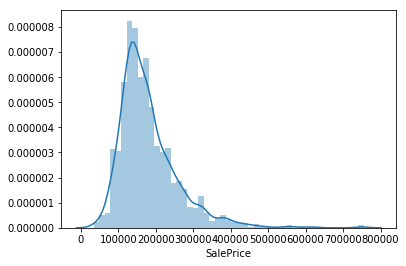

In [0]:
sns.distplot(df_train['SalePrice'])

In [0]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [0]:
#df_train['SalePrice'].plot(kind='kde')

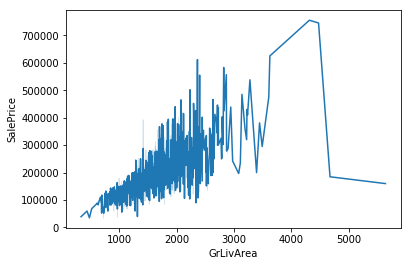

In [0]:
#fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 8))
#ax0.set_title('Original Distributions')
ax0 = sns.lineplot(x="GrLivArea", y="SalePrice", data=df_train)
#ax0.set(xscale="log")
#ax0 = sns.lineplot(x="...........", y="SalePrice", data=df_train)

In [0]:
#plotting links
#https://seaborn.pydata.org/tutorial/axis_grids.html
#https://dev.to/nexttech/how-to-perform-exploratory-data-analysis-with-seaborn-29eo

In [0]:
'''numerical = [
  'SalePrice', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr'
]
categorical = [
  'MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold'
]

df_train[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
'''

"numerical = [\n  'SalePrice', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr'\n]\ncategorical = [\n  'MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold'\n]\n\ndf_train[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));\n\nfig, ax = plt.subplots(2, 4, figsize=(20, 10))\nfor variable, subplot in zip(categorical, ax.flatten()):\n    sns.countplot(housing[variable], ax=subplot)\n    for label in subplot.get_xticklabels():\n        label.set_rotation(90)\n        \n"

In [0]:
#fig = sns.boxplot(x=var, y="SalePrice", data=data)

##Relation with numerical variables

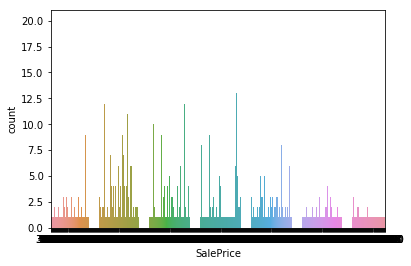

In [0]:
sns.countplot(df_train['SalePrice'])

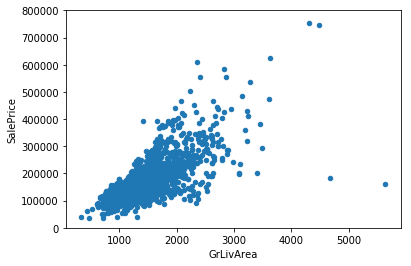

In [0]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

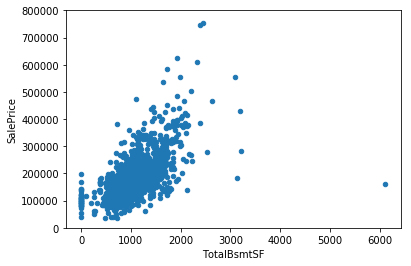

In [0]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

##Relationship with categorical features

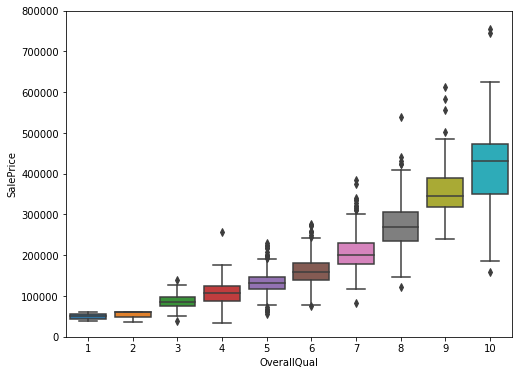

In [0]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

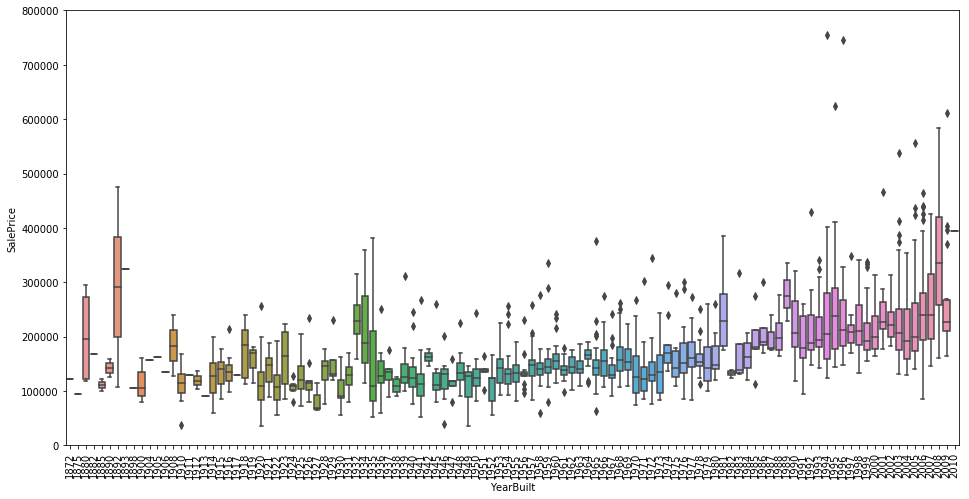

In [0]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

##Coorelations

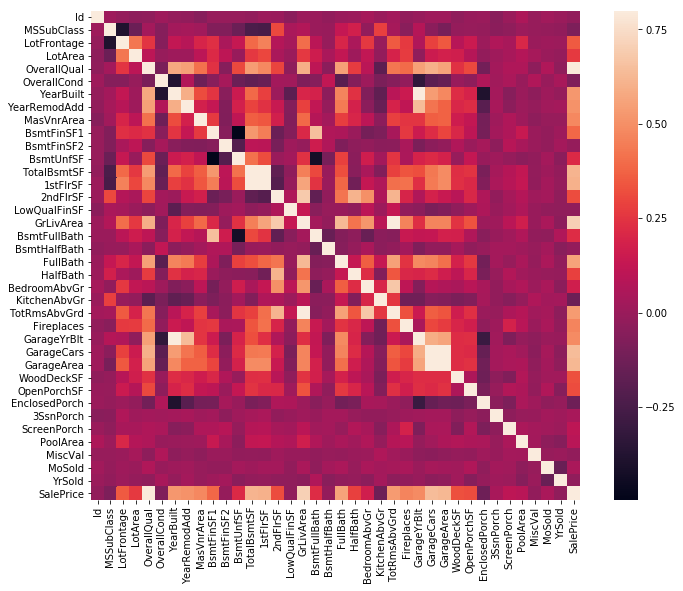

In [0]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

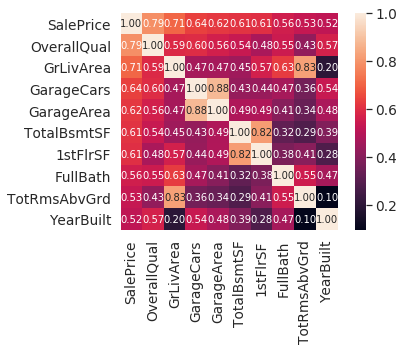

In [0]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


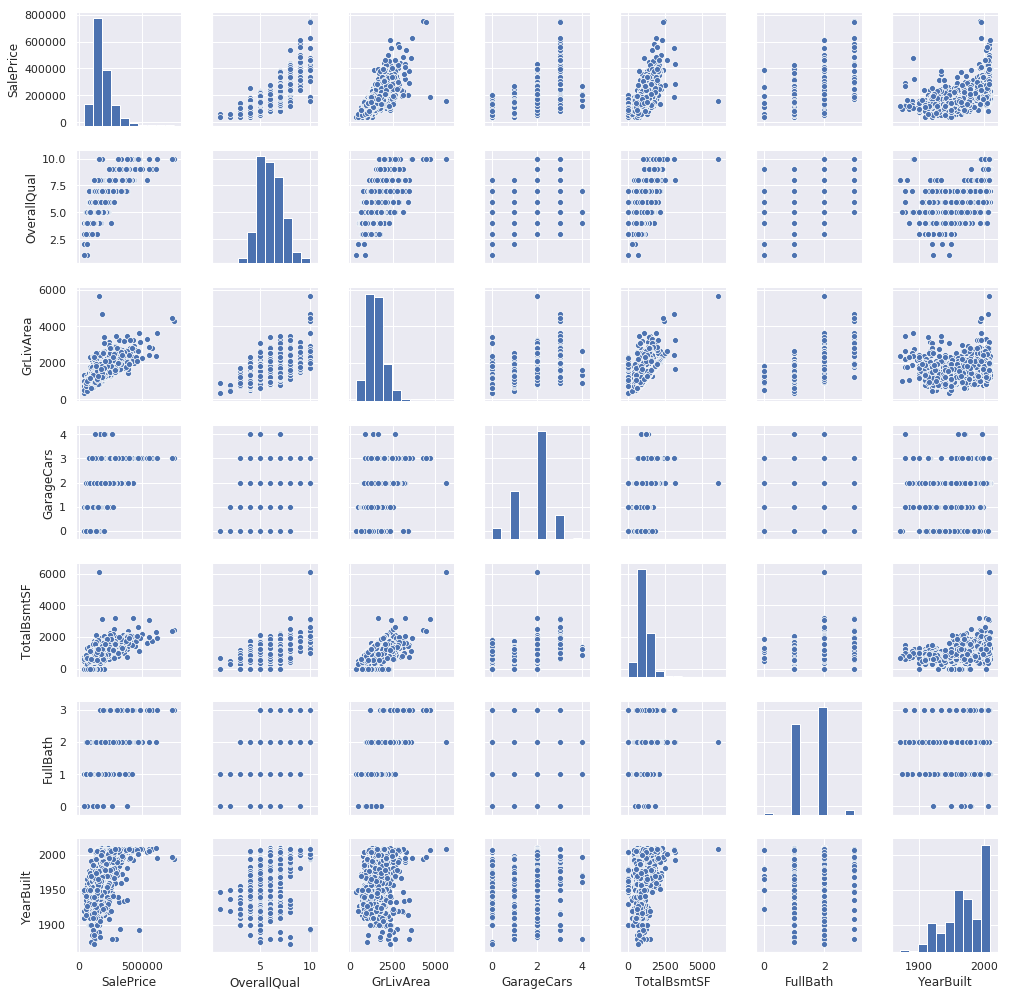

In [0]:
#scatterplot
sns.set()
select_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[select_cols], size = 2)
plt.show();

##Target vs features

In [0]:
'''categorical = [
  'MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold'
]


fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)'''

"categorical = [\n  'MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold'\n]\n\n\nfig, ax = plt.subplots(3, 3, figsize=(15, 10))\nfor var, subplot in zip(categorical, ax.flatten()):\n    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)"

#Data Transformation

##Log transform


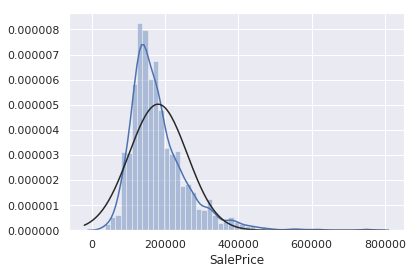

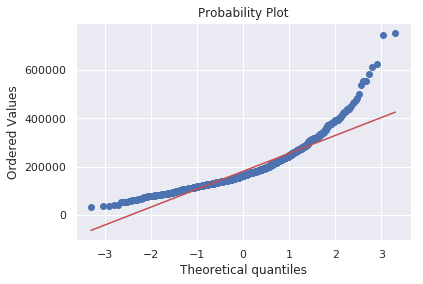

In [0]:
from scipy.stats import norm

sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [0]:
df_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [0]:
#df_train['SalePrice'] = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

In [0]:
#from scipy.stats import norm

#sns.distplot(df_train['SalePrice'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(df_train['SalePrice'], plot=plt)

In [0]:
#df_train['SalePrice']


In [0]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])


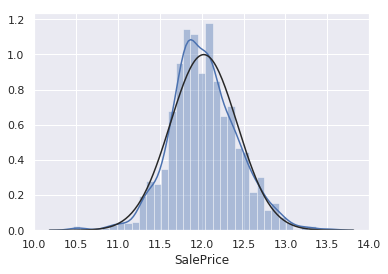

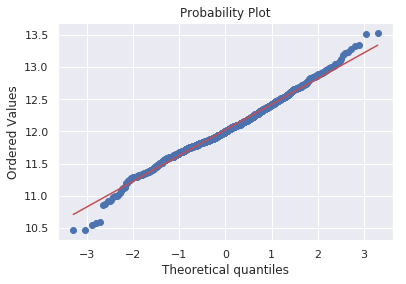

In [0]:
from scipy.stats import norm

sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [0]:
df_train['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [0]:
#df_train['SalePrice'].fillna(0, inplace=True)

In [0]:
#df_train['SalePrice'].isna().sum()

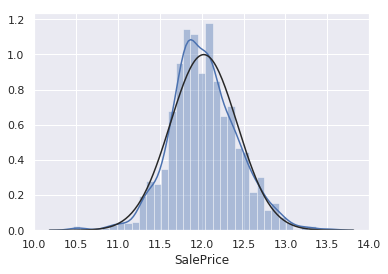

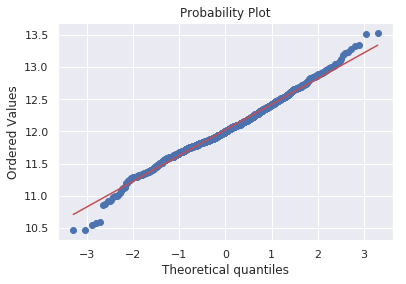

In [0]:
from scipy.stats import norm

sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [0]:
df_train['SalePrice']

##Scaling

###Scaling is only done when 
1. there are missing values(if there are many missing values) 
2. outliers (if range is high, better to scale)

In [0]:
#select_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

In [0]:
# separate array into input and output components
#array=df_train[select_cols].values
#x=array[:,1:]
#y=array[:,0]

In [0]:
#Step 1 - Rescale data: all of the values are in the range between 0 and 1
#Use as default

#from sklearn.preprocessing import MinMaxScaler
#scaler1=MinMaxScaler(feature_range=(0,1))
#rescaledX1=scaler1.fit_transform(x)

# summarize transformed data
#np.set_printoptions(precision=3)
#print(rescaledX1[:,:])

In [0]:
#rescaledX1=pd.DataFrame(rescaledX1)

In [0]:
#rescaledX1.head()

In [0]:
#Step 2 - Standardize data: from Gaussian to std Gaussian (mean=0, std=1)
#Use StandardScaler if you need normalized features

#from sklearn.preprocessing import StandardScaler

#scaler2 = StandardScaler().fit(x)
#rescaledX2 = scaler2.transform(x)

# summarize transformed data
#np.set_printoptions(precision=3)
#print(rescaledX2[:,:])

In [0]:
#Step 3 - Normalize data: length of 1
#Use Normalizer sparingly - it normalizes rows, not columns

#from sklearn.preprocessing import Normalizer

#scaler3 = Normalizer().fit(x)
#normalizedX3 = scaler3.transform(x)

# summarize transformed data
#np.set_printoptions(precision=3)
#print(normalizedX3[0:5,:])

In [0]:
#Step 4 - Binarization/thresholding: Above the threshold - 1, Below the threshold - 0
#from sklearn.preprocessing import Binarizer

#binarizer = Binarizer(threshold=0.0).fit(x)
#binaryX = binarizer.transform(x)
# summarize transformed data
#np.set_printoptions(precision=3)
#print(binaryX[0:5,:])

In [0]:
'''fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 8))

ax0.set_title('Original Distributions')

sns.kdeplot(df_train['OverallQual'], ax=ax0)
sns.kdeplot(df_train['GrLivArea'], ax=ax0)
sns.kdeplot(df_train['GarageCars'], ax=ax0)
sns.kdeplot(df_train['TotalBsmtSF'], ax=ax0)
sns.kdeplot(df_train['FullBath'], ax=ax0)
sns.kdeplot(df_train['YearBuilt'], ax=ax0);


ax1.set_title('After MinMaxScaler')

sns.kdeplot(rescaledX1['OverallQual'], ax=ax1)
sns.kdeplot(rescaledX1['GrLivArea'], ax=ax1)
sns.kdeplot(rescaledX1['GarageCars'], ax=ax1)
sns.kdeplot(rescaledX1['TotalBsmtSF'], ax=ax1)
sns.kdeplot(rescaledX1['FullBath'], ax=ax1)
sns.kdeplot(rescaledX1['YearBuilt'], ax=ax1);


ax2.set_title('After StandardScaler')

sns.kdeplot(rescaledX2['OverallQual'], ax=ax2)
sns.kdeplot(rescaledX2['GrLivArea'], ax=ax2)
sns.kdeplot(rescaledX2['GarageCars'], ax=ax2)
sns.kdeplot(rescaledX2['TotalBsmtSF'], ax=ax2)
sns.kdeplot(rescaledX2['FullBath'], ax=ax2)
sns.kdeplot(rescaledX2['YearBuilt'], ax=ax2);
'''

"fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20, 8))\n\nax0.set_title('Original Distributions')\n\nsns.kdeplot(df_train['OverallQual'], ax=ax0)\nsns.kdeplot(df_train['GrLivArea'], ax=ax0)\nsns.kdeplot(df_train['GarageCars'], ax=ax0)\nsns.kdeplot(df_train['TotalBsmtSF'], ax=ax0)\nsns.kdeplot(df_train['FullBath'], ax=ax0)\nsns.kdeplot(df_train['YearBuilt'], ax=ax0);\n\n\nax1.set_title('After MinMaxScaler')\n\nsns.kdeplot(rescaledX1['OverallQual'], ax=ax1)\nsns.kdeplot(rescaledX1['GrLivArea'], ax=ax1)\nsns.kdeplot(rescaledX1['GarageCars'], ax=ax1)\nsns.kdeplot(rescaledX1['TotalBsmtSF'], ax=ax1)\nsns.kdeplot(rescaledX1['FullBath'], ax=ax1)\nsns.kdeplot(rescaledX1['YearBuilt'], ax=ax1);\n\n\nax2.set_title('After StandardScaler')\n\nsns.kdeplot(rescaledX2['OverallQual'], ax=ax2)\nsns.kdeplot(rescaledX2['GrLivArea'], ax=ax2)\nsns.kdeplot(rescaledX2['GarageCars'], ax=ax2)\nsns.kdeplot(rescaledX2['TotalBsmtSF'], ax=ax2)\nsns.kdeplot(rescaledX2['FullBath'], ax=ax2)\nsns.kdeplot(rescale

#Missing Data 

##Concatenating train and test data

In [0]:
df_test = pd.read_csv('/content/drive/My Drive/Ames housing/test.csv')

In [0]:
#train = df[df['is_goal'].notnull()]
#test = df[df['is_goal'].isnull()]

In [0]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

In [0]:
y_train = df_train.SalePrice.values

In [0]:
all_data = pd.concat([df_train, df_test], axis = 0) #one below the other

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [0]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [0]:
all_data.shape

(2919, 80)

##How many missing values are there? and graph

In [0]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

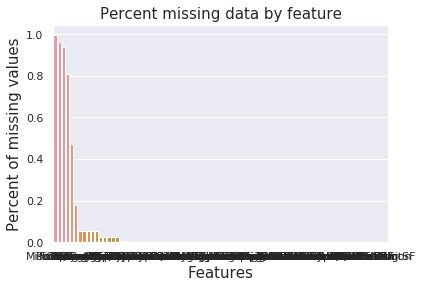

In [0]:
sns.barplot(x=percent.index, y=percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

##Dropping 


####If more than 15% of the data is missing and if they are strong candidates for outliers , there's no point of the column and thus it can be dropped. 

####Check for correlation with non missing data and then drop the column.

In [0]:
#Directly dropping columns
#df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
#df_train.isnull().sum().max()

##Imputing

In [0]:
df_num = all_data.select_dtypes(include=[np.float,np.int])

In [0]:
df_obj = all_data.select_dtypes(exclude=[np.number])

In [0]:
from sklearn.preprocessing import Imputer
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
df_num_imp = pd.DataFrame(fill_NaN.fit_transform(df_num))
df_num_imp.columns = df_num.columns
df_num_imp.index = df_num.index

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
df_obj_imp = df_obj.fillna(df_obj.mode().iloc[0])
df_obj_imp.head(10)

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Foundation,Functional,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,Grvl,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,MnPrv,Gd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,Reg,RL,BrkFace,Shed,CollgCr,Y,Ex,CompShg,Gable,Normal,WD,Pave,AllPub
1,Grvl,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,SBrkr,TA,TA,MetalSd,MetalSd,MnPrv,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,TA,Lvl,Gtl,FR2,Reg,RL,None,Shed,Veenker,Y,Ex,CompShg,Gable,Normal,WD,Pave,AllPub
2,Grvl,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,MnPrv,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,Inside,IR1,RL,BrkFace,Shed,CollgCr,Y,Ex,CompShg,Gable,Normal,WD,Pave,AllPub
3,Grvl,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Shng,MnPrv,Gd,BrkTil,Typ,TA,Unf,TA,Detchd,GasA,Gd,2Story,Gd,Lvl,Gtl,Corner,IR1,RL,None,Shed,Crawfor,Y,Ex,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,Grvl,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,MnPrv,TA,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,Gd,Lvl,Gtl,FR2,IR1,RL,BrkFace,Shed,NoRidge,Y,Ex,CompShg,Gable,Normal,WD,Pave,AllPub
5,Grvl,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,MnPrv,Gd,Wood,Typ,TA,Unf,TA,Attchd,GasA,Ex,1.5Fin,TA,Lvl,Gtl,Inside,IR1,RL,None,Shed,Mitchel,Y,Ex,CompShg,Gable,Normal,WD,Pave,AllPub
6,Grvl,1Fam,TA,Av,GLQ,Unf,Ex,Y,Norm,Norm,SBrkr,TA,Gd,VinylSd,VinylSd,MnPrv,Gd,PConc,Typ,TA,RFn,TA,Attchd,GasA,Ex,1Story,Gd,Lvl,Gtl,Inside,Reg,RL,Stone,Shed,Somerst,Y,Ex,CompShg,Gable,Normal,WD,Pave,AllPub
7,Grvl,1Fam,TA,Mn,ALQ,BLQ,Gd,Y,PosN,Norm,SBrkr,TA,TA,HdBoard,HdBoard,MnPrv,TA,CBlock,Typ,TA,RFn,TA,Attchd,GasA,Ex,2Story,TA,Lvl,Gtl,Corner,IR1,RL,Stone,Shed,NWAmes,Y,Ex,CompShg,Gable,Normal,WD,Pave,AllPub
8,Grvl,1Fam,TA,No,Unf,Unf,TA,Y,Artery,Norm,FuseF,TA,TA,BrkFace,Wd Shng,MnPrv,TA,BrkTil,Min1,TA,Unf,Fa,Detchd,GasA,Gd,1.5Fin,TA,Lvl,Gtl,Inside,Reg,RM,None,Shed,OldTown,Y,Ex,CompShg,Gable,Abnorml,WD,Pave,AllPub
9,Grvl,2fmCon,TA,No,GLQ,Unf,TA,Y,Artery,Artery,SBrkr,TA,TA,MetalSd,MetalSd,MnPrv,TA,BrkTil,Typ,TA,RFn,Gd,Attchd,GasA,Ex,1.5Unf,TA,Lvl,Gtl,Corner,Reg,RL,None,Shed,BrkSide,Y,Ex,CompShg,Gable,Normal,WD,Pave,AllPub


In [0]:
total = df_num_imp.isnull().sum().sort_values(ascending=False)
percent = (df_num_imp.isnull().sum()/df_num_imp.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
YrSold,0,0.0
Id,0,0.0
GrLivArea,0,0.0
GarageYrBlt,0,0.0
GarageCars,0,0.0
GarageArea,0,0.0
FullBath,0,0.0
Fireplaces,0,0.0
EnclosedPorch,0,0.0
BsmtUnfSF,0,0.0


##Feature Engineering

In [0]:
'''#Transforming some numerical variables that are really categorical

#MSSubClass=The building class
df_num_imp['MSSubClass'] = df_num_imp['MSSubClass'].astype(str)


#Changing OverallCond into a categorical variable
df_num_imp['OverallCond'] = df_num_imp['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_num_imp['YrSold'] = df_num_imp['YrSold'].astype(str)
df_num_imp['MoSold'] = df_num_imp['MoSold'].astype(str)'''

"#Transforming some numerical variables that are really categorical\n\n#MSSubClass=The building class\ndf_num_imp['MSSubClass'] = df_num_imp['MSSubClass'].astype(str)\n\n\n#Changing OverallCond into a categorical variable\ndf_num_imp['OverallCond'] = df_num_imp['OverallCond'].astype(str)\n\n\n#Year and month sold are transformed into categorical features.\ndf_num_imp['YrSold'] = df_num_imp['YrSold'].astype(str)\ndf_num_imp['MoSold'] = df_num_imp['MoSold'].astype(str)"

In [0]:
#df_num_imp['MSSubClass'],df_num_imp['OverallCond'],df_num_imp['YrSold'],df_num_imp['MoSold']

###Label encoding categorical variables

In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    le = LabelEncoder() 
    le.fit(list(df_obj_imp[c].values)) 
    df_obj_imp[c] = le.transform(list(df_obj_imp[c].values))

# shape        
print('Shape df_obj_imp: {}'.format(df_obj_imp.shape))

KeyError: ignored

## Adding total sqfootage feature 

In [0]:
# Adding total sqfootage feature 
df_num_imp['TotalSF'] = df_num_imp['TotalBsmtSF'] + df_num_imp['1stFlrSF'] + df_num_imp['2ndFlrSF']

##Skewness of numerical variables

In [0]:
from scipy.stats import norm, skew

numeric_feats = df_num_imp.dtypes[df_num_imp.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_num_imp[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
GarageCars,53.711887
BsmtHalfBath,48.440333
BsmtFullBath,48.432326
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LotFrontage,4.805879
KitchenAbvGr,4.302254


In [0]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_num_imp[feat] = boxcox1p(df_num_imp[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 38 skewed numerical features to Box Cox transform


##OHE

In [0]:
#encoding   
df_obj_imp = pd.get_dummies(df_obj_imp)

In [0]:
df_obj_imp

##Training data after imputation

In [0]:
imp_data=pd.concat([df_num_imp,df_obj_imp],axis=1,join='inner')

In [0]:
imp_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,Alley,BsmtCond,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa
0,11.692623,11.686189,0.0,1.540963,11.170327,0.0,0.730463,0.000000,7.483296,0.000000,0.000000,1.194318,10.506271,1.194318,14.187527,13.698888,0.730463,0.730463,0.730463,19.212182,5.831328,0.0,5.684507,8.059126,0.0,1.194318,5.714669,2.055642,2.440268,0.0,0.0,2.602594,11.692623,0.000000,14.187527,14.187527,14.195323,14.976591,0,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,12.792276,0.000000,0.0,1.540963,12.062832,0.0,0.000000,0.730463,8.897844,0.000000,0.730463,1.194318,10.062098,1.194318,14.145138,12.792276,0.000000,1.194318,0.730463,19.712205,6.221214,0.0,3.858807,0.000000,0.0,2.055642,0.000000,2.602594,2.259674,0.0,0.0,2.259674,12.792276,9.010206,14.145138,14.145138,14.193765,14.923100,0,3,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2,11.892039,11.724598,0.0,1.540963,10.200343,0.0,0.730463,0.000000,9.917060,0.000000,0.730463,1.194318,10.775536,1.194318,14.184404,13.832085,0.730463,1.540963,0.730463,20.347241,5.914940,0.0,5.684507,7.646538,0.0,2.750250,5.053371,2.055642,2.440268,0.0,0.0,2.259674,11.892039,0.000000,14.184404,14.185966,14.195323,15.149678,0,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,12.013683,11.354094,0.0,1.540963,8.274266,0.0,0.730463,0.000000,10.468500,8.797736,0.730463,0.730463,10.918253,1.540963,14.179714,13.711364,0.000000,1.820334,0.730463,19.691553,5.684507,0.0,5.968981,0.000000,0.0,1.194318,4.745132,2.055642,2.440268,0.0,0.0,2.440268,11.354094,0.000000,14.047529,14.135652,14.192207,14.857121,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,12.510588,12.271365,0.0,1.820334,10.971129,0.0,0.730463,0.000000,10.221051,0.000000,0.730463,1.194318,11.627708,1.540963,14.182841,14.480029,0.730463,2.055642,0.730463,21.325160,6.314735,0.0,5.684507,9.391827,0.0,3.128239,6.314735,2.055642,2.602594,0.0,0.0,2.750250,12.510588,8.013884,14.182841,14.182841,14.195323,15.852312,0,3,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [0]:
imp_data.shape

(2919, 222)

In [0]:
train = imp_data[:ntrain]
test = imp_data[ntrain:]

In [0]:
train.head()

In [0]:
train.shape

(1460, 222)

In [0]:
test.shape

(1459, 222)

#Feature selection

#Model selection

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [0]:
#Validation function

def rmsle_cv(model):
    kf = KFold(n_splits= 5, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
  
  

In [0]:
#lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso = Lasso(alpha =0.0005, random_state=1)
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1249 (0.0147)

ElasticNet score: 0.1241 (0.0156)

Kernel Ridge score: 0.1283 (0.0122)

Gradient Boosting score: 0.1235 (0.0130)

Gradient Boosting score: 0.1235 (0.0130)

LGBM score: 0.1234 (0.0083)



##Meta model function 

In [0]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [0]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

##ensembling

In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

In [0]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

In [0]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

In [0]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

In [0]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [0]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

#Back up Stacking (code from different data set)

In [0]:
#%%
model1=SVC(gamma=0.001,probability=True)
model1.fit(X_train,Y_train)
pred1 = model1.predict(X_test)
print("SVM Accuracy", accuracy_score(pred1, Y_test))
x_test = act_test.loc[:,['location_y', 'remaining_min','remaining_sec','distance_of_shot','home/away']].astype(int)

#y_pred_svm1 = model1.predict(x_test)
#y_prob=model1.predict_proba(x_test)
#act_test['is_goal']=y_prob

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy 0.6126271396675763


In [0]:
#XGBOOST
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from numpy import loadtxt

from xgboost import XGBClassifier
from matplotlib import pyplot


#model=SVC(gamma=0.001,probability=True)
model2=XGBClassifier()
model2.fit(X_train,Y_train)
pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
predictions = [round(value) for value in pred2]
accuracy = accuracy_score(Y_test, predictions)
print((accuracy))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6169684941701811


In [0]:
test_pred1=model1.predict(x_test)
test_pred2=model2.predict(x_test)

In [0]:
stacked_pred=np.column_stack((pred1,pred2))
stacked_pred_test=np.column_stack((test_pred1,test_pred2))

In [0]:
from sklearn.linear_model import LinearRegression
meta_model=LinearRegression()

In [0]:
meta_model.fit(stacked_pred,Y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
final_pred=meta_model.predict(stacked_pred_test)

In [0]:
final_pred.shape

(6268, 1)

In [0]:
pred1.shape,pred2.shape,stacked_pred.shape,Y_test.shape

((8062,), (8062,), (8062, 2), (8062, 1))

In [0]:
test_pred1.shape,test_pred2.shape,stacked_pred_test.shape

((6268,), (6268,), (6268, 2))

In [0]:
act_test['is_goal'].shape

(6268,)

In [0]:
final_pred.predict_proba(x_test)

In [0]:
from sklearn.metrics import accuracy_score
print("ES Accuracy", accuracy_score(final_pred, act_test['is_goal'].astype(int)))

In [0]:

#6.SAVING
act_test.index=act_test.index+1
act_test.reset_index(level=0, inplace=True)
act_test=act_test.drop(columns=['location_y','remaining_min','remaining_sec','distance_of_shot','home/away'])
code1 = act_test.rename(columns = {"index": "shot_id_number"}) 
code1.to_csv('anuhya_katta_100397_code_1.csv',sep=",", float_format='%.2f',index=False, line_terminator='\n')



In [0]:
#SAMPLE NOTES/OTHER METHODS

'''filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

OR

scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

'''